In [1]:
import numpy as np
import pandas as pd

In [2]:
path= "../data/processed/BVSP_returns.xlsx"
df = pd.read_excel(path).loc[:,["datetime", "r_t"]]
df

,datetime,r_t
0,2025-05-09 10:05:00,0.001650
1,2025-05-09 10:10:00,0.000186
2,2025-05-09 10:15:00,0.000668
3,2025-05-09 10:20:00,0.000016
4,2025-05-09 10:25:00,-0.000888
...,...,...
11469,2025-11-14 16:40:00,-0.000255
11470,2025-11-14 16:45:00,0.000344
11471,2025-11-14 16:50:00,0.000202
11472,2025-11-14 16:55:00,-0.000096


In [3]:
df["date"] = df["datetime"].dt.date
df["time"] = df["datetime"].dt.time

In [4]:
# pivot to wide format
returns = df.pivot(index="time", columns="date", values="r_t")
returns.fillna(returns.mean(axis=0).mean(), inplace=True)
returns

date,2025-05-09,2025-05-12,2025-05-13,2025-05-14,2025-05-15,2025-05-16,2025-05-19,2025-05-20,2025-05-21,2025-05-22,...,2025-11-03,2025-11-04,2025-11-05,2025-11-06,2025-11-07,2025-11-10,2025-11-11,2025-11-12,2025-11-13,2025-11-14
time,,,,,,,,,,,,,,,,,,,,,
10:00:00,0.000013,0.000401,0.001025,-0.000209,0.000191,-0.000640,-0.000567,-0.000059,-0.001468,0.000029,...,0.001345,-0.002193,0.000625,0.000521,-0.001515,0.001599,0.000816,0.000196,0.002274,-0.000096
10:05:00,0.001650,0.005783,0.001332,-0.001808,0.000190,-0.001614,-0.000080,-0.000137,-0.001692,0.002553,...,-0.000321,-0.000972,-0.001265,0.003632,-0.000195,0.005056,0.006151,0.000495,-0.002867,-0.001522
10:10:00,0.000186,-0.000437,0.000390,0.002208,0.000190,-0.001185,-0.000437,-0.001313,-0.000154,-0.001663,...,0.002498,0.000560,0.001152,0.000606,-0.001242,-0.000751,0.001339,0.000735,0.001060,0.000360
10:15:00,0.000668,-0.001724,0.001835,-0.000394,0.000190,-0.006405,0.000428,-0.000951,0.001047,0.000068,...,-0.000294,0.000643,-0.001085,-0.000445,0.001988,-0.000856,0.000798,-0.001151,0.001413,0.001121
10:20:00,0.000016,-0.001247,0.002284,0.001109,0.000190,-0.000040,0.000025,0.000930,-0.000055,-0.000076,...,-0.001736,0.000064,0.001857,0.000817,-0.000308,0.001132,0.001468,0.000986,0.002795,0.000449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16:40:00,-0.000039,-0.000938,-0.000470,0.000057,-0.000368,0.000067,-0.000349,-0.000076,0.000669,-0.001386,...,-0.000122,0.000241,0.000255,-0.000271,0.000430,0.000039,-0.000065,0.000142,0.000203,-0.000255
16:45:00,-0.000039,0.000531,-0.000194,-0.000237,0.000397,0.000127,-0.000465,0.000693,-0.000347,0.001025,...,-0.000065,-0.000180,0.000823,-0.000248,-0.000110,-0.000466,-0.000082,-0.000357,0.000451,0.000344
16:50:00,0.000682,0.000195,-0.000471,-0.000051,0.000595,0.000073,0.000453,0.000765,-0.000744,-0.000042,...,-0.000165,0.000297,0.000286,-0.000213,0.000096,-0.000206,-0.000021,0.000619,0.000242,0.000202


In [16]:
from scipy.stats import gaussian_kde

In [17]:
df_returns = pd.read_excel("../data/processed/BVSP_returns_wide.xlsx", index_col="time")
# df_returns.drop(columns="time", inplace=True)
df_returns

,2025-05-09,2025-05-12,2025-05-13,2025-05-14,2025-05-15,2025-05-16,2025-05-19,2025-05-20,2025-05-21,2025-05-22,...,2025-11-03,2025-11-04,2025-11-05,2025-11-06,2025-11-07,2025-11-10,2025-11-11,2025-11-12,2025-11-13,2025-11-14
time,,,,,,,,,,,,,,,,,,,,,
10:00:00,0.000013,0.000401,0.001025,-0.000209,0.000191,-0.000640,-0.000567,-0.000059,-0.001468,0.000029,...,0.001345,-0.002193,0.000625,0.000521,-0.001515,0.001599,0.000816,0.000196,0.002274,-0.000096
10:05:00,0.001650,0.005783,0.001332,-0.001808,0.000190,-0.001614,-0.000080,-0.000137,-0.001692,0.002553,...,-0.000321,-0.000972,-0.001265,0.003632,-0.000195,0.005056,0.006151,0.000495,-0.002867,-0.001522
10:10:00,0.000186,-0.000437,0.000390,0.002208,0.000190,-0.001185,-0.000437,-0.001313,-0.000154,-0.001663,...,0.002498,0.000560,0.001152,0.000606,-0.001242,-0.000751,0.001339,0.000735,0.001060,0.000360
10:15:00,0.000668,-0.001724,0.001835,-0.000394,0.000190,-0.006405,0.000428,-0.000951,0.001047,0.000068,...,-0.000294,0.000643,-0.001085,-0.000445,0.001988,-0.000856,0.000798,-0.001151,0.001413,0.001121
10:20:00,0.000016,-0.001247,0.002284,0.001109,0.000190,-0.000040,0.000025,0.000930,-0.000055,-0.000076,...,-0.001736,0.000064,0.001857,0.000817,-0.000308,0.001132,0.001468,0.000986,0.002795,0.000449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16:40:00,-0.000039,-0.000938,-0.000470,0.000057,-0.000368,0.000067,-0.000349,-0.000076,0.000669,-0.001386,...,-0.000122,0.000241,0.000255,-0.000271,0.000430,0.000039,-0.000065,0.000142,0.000203,-0.000255
16:45:00,-0.000039,0.000531,-0.000194,-0.000237,0.000397,0.000127,-0.000465,0.000693,-0.000347,0.001025,...,-0.000065,-0.000180,0.000823,-0.000248,-0.000110,-0.000466,-0.000082,-0.000357,0.000451,0.000344
16:50:00,0.000682,0.000195,-0.000471,-0.000051,0.000595,0.000073,0.000453,0.000765,-0.000744,-0.000042,...,-0.000165,0.000297,0.000286,-0.000213,0.000096,-0.000206,-0.000021,0.000619,0.000242,0.000202


In [23]:
# 1) Global support
global_min = df_returns.min().min()
global_max = df_returns.max().max()

m = 3000
u = np.linspace(global_min, global_max, m)

# 2) Prepare density matrix (m × T)
df_densities = pd.DataFrame(index=u, columns=df_returns.columns)

# 3) KDE for each day evaluated on a common support
for t in df_returns.columns:
    kde = gaussian_kde(df_returns[t])
    df_densities[t] = kde(u)

In [26]:
np.where(df_densities.values<0)

(array([], dtype=int64), array([], dtype=int64))

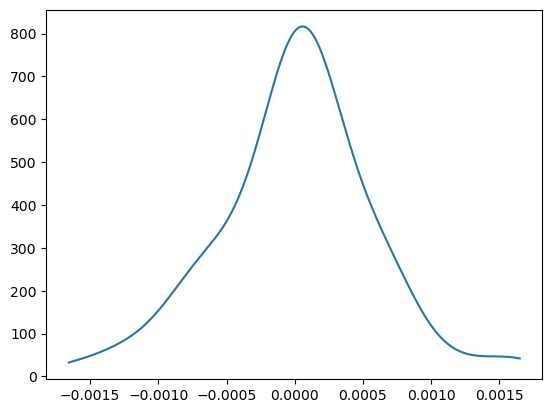

In [47]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(df_grid.iloc[:,0], df_densities.iloc[:,0])

plt.show()

In [27]:
df_densities

,2025-05-09,2025-05-12,2025-05-13,2025-05-14,2025-05-15,2025-05-16,2025-05-19,2025-05-20,2025-05-21,2025-05-22,...,2025-11-03,2025-11-04,2025-11-05,2025-11-06,2025-11-07,2025-11-10,2025-11-11,2025-11-12,2025-11-13,2025-11-14
-0.010323,1.711039e-290,6.488436e-111,1.401400e-178,3.759331e-203,6.816199e-214,2.961104e-18,5.689170e-234,1.587455e-181,1.750181e-157,6.699048e-55,...,2.173340e-176,1.898166e-303,1.002446e-227,6.988181e-271,1.290040e-218,7.227437e-163,3.756730e-94,1.438911e-204,1.213045e-86,1.532485e-132
-0.010316,4.922276e-290,9.750348e-111,2.667176e-178,7.979037e-203,1.566329e-213,3.437162e-18,1.360143e-233,3.091578e-181,3.198271e-157,8.667760e-55,...,4.233368e-176,6.157135e-303,2.214961e-227,1.772924e-270,2.821983e-218,1.281119e-162,5.390182e-94,3.180056e-204,1.751315e-86,2.523398e-132
-0.010309,1.414849e-289,1.464737e-110,5.073678e-178,1.692497e-202,3.596821e-213,3.988719e-18,3.249483e-233,6.017671e-181,5.841581e-157,1.121211e-54,...,8.241518e-176,1.995232e-302,4.891151e-227,4.494843e-270,6.169383e-218,2.269892e-162,7.731550e-94,7.023381e-204,2.527583e-86,4.153351e-132
-0.010302,4.063423e-289,2.199675e-110,9.646633e-178,3.587920e-202,8.253724e-213,4.627578e-18,7.757795e-233,1.170702e-180,1.066420e-156,1.449954e-54,...,1.603582e-175,6.459191e-302,1.079434e-226,1.138774e-269,1.347923e-217,4.020050e-162,1.108663e-93,1.550131e-203,3.646701e-86,6.833372e-132
-0.010295,1.166036e-288,3.302303e-110,1.833202e-177,7.601427e-202,1.892677e-212,5.367364e-18,1.850788e-232,2.276322e-180,1.945849e-156,1.874595e-54,...,3.118443e-175,2.088974e-301,2.380792e-226,2.883098e-269,2.943232e-217,7.116533e-162,1.589287e-93,3.419014e-203,5.259551e-86,1.123815e-131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.010149,2.655135e-279,2.476846e-28,4.767658e-144,1.210775e-176,2.249178e-241,4.013731e-66,2.137030e-207,2.694908e-141,4.022068e-190,6.494942e-50,...,3.926483e-148,0.000000e+00,1.288853e-179,1.773374e-136,1.339875e-187,3.773315e-52,6.371291e-22,2.788422e-191,2.687440e-84,1.149253e-119
0.010156,9.413052e-280,2.013623e-28,2.673028e-144,5.997666e-177,9.287773e-242,3.026393e-66,9.398775e-208,1.495677e-141,2.072195e-190,5.078581e-50,...,2.129876e-148,0.000000e+00,6.367717e-180,9.146873e-137,6.483908e-188,2.725877e-52,5.345817e-22,1.294244e-191,1.870123e-84,7.151680e-120
0.010163,3.334358e-280,1.636503e-28,1.497902e-144,2.969195e-177,3.832611e-242,2.281337e-66,4.130723e-208,8.296620e-142,1.067074e-190,3.970050e-50,...,1.154696e-148,0.000000e+00,3.144158e-180,4.714586e-137,3.135779e-188,1.968340e-52,4.484051e-22,6.003225e-192,1.300934e-84,4.448604e-120
0.010170,1.180136e-280,1.329581e-28,8.389678e-145,1.469037e-177,1.580422e-242,1.719255e-66,1.814159e-208,4.599750e-142,5.492141e-191,3.102674e-50,...,6.256676e-149,0.000000e+00,1.551547e-180,2.428361e-137,1.515619e-188,1.420707e-52,3.760077e-22,2.782682e-192,9.046781e-85,2.766069e-120


In [41]:
n = df_densities.shape[1]
M = df_densities.shape[0] # number of gridpoints for LQD functions - chosen large here so that 0 isn't too close to the boundary of all supports
# u = seq(from = -0.01032280959030984, to = 0.01017648430576656, length = M)
u = df_densities.index.values
# lqd = matrix(0, nrow = M, ncol = n)
# c = rep(0, 1, n)
t = np.linspace(0, 1, M)
t0 = u[np.argmin(np.abs(u))] # closest value to 0

In [46]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import cumulative_trapezoid, trapezoid


def dens2lqd(dens, dSup, lqdSup=None, t0=None, verbose=True):
    dens = np.asarray(dens)
    dSup = np.asarray(dSup)

    # Default t0
    if t0 is None:
        t0 = dSup[0]

    # ---- Check density requirements ----
    if np.any(dens < 0):
        raise ValueError("Please correct negative density values.")

    if abs(trapezoid(dens, dSup) - 1) > 1e-5:
        if verbose:
            print("Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.")
        dens = dens / trapezoid(dens, dSup)

    # ---- Handle zero density values by truncating support ----
    if np.any(dens == 0):
        if verbose:
            print("There are some zero density values - truncating support grid so all are positive")

        positive_idx = np.where(dens > 0)[0]
        lbd, ubd = positive_idx[0], positive_idx[-1]

        dens = dens[lbd:ubd+1]
        dSup = dSup[lbd:ubd+1]

        dens = dens / trapezoid(dens, dSup)

    N = len(dSup)

    # ---- Check LQD output grid ----
    if lqdSup is None:
        lqdSup = np.linspace(0, 1, N)
    else:
        lqdSup = np.asarray(lqdSup)
        if not (np.isclose(lqdSup.min(), 0) and np.isclose(lqdSup.max(), 1)):
            if verbose:
                print("Problem with support of the LQD domain’s boundaries - resetting to default.")
            lqdSup = np.linspace(0, 1, N)

    # ---- Check t0 ----
    if t0 not in dSup:
        if verbose:
            print("t0 is not a value in dSup - resetting to closest value")
        t0 = dSup[np.argmin(np.abs(dSup - t0))]

    M = len(lqdSup)
    c_ind = np.where(dSup == t0)[0][0]

    # ---- Compute CDF and constant c ----
    tmp = cumulative_trapezoid(dens, dSup, initial=0)
    c = tmp[c_ind]

    # ---- Remove duplicated CDF values (monotonicity issues in KDE) ----
    left_dup  = np.concatenate([np.diff(tmp[:N//2]) == 0, [False]])
    right_dup = np.concatenate([[False], np.diff(tmp[N//2:]) == 0])

    # NOTE: In R: !c(indL, indR)
    keep = ~(np.concatenate([left_dup, right_dup]))

    qtemp = tmp[keep]
    lqd_temp = -np.log(dens[keep])

    # ---- Interpolate lqd on the desired LQD support ----
    lqd = np.zeros(M)

    # Handle infinite boundary values
    temp_first_inf = np.isinf(lqd_temp[0])
    temp_last_inf = np.isinf(lqd_temp[-1])

    if temp_first_inf or temp_last_inf:

        tmpInd = np.arange(len(qtemp))
        Ind = np.arange(M)

        if temp_first_inf:
            lqd[0] = np.inf
            tmpInd = tmpInd[1:]
            Ind = Ind[1:]

        if temp_last_inf:
            lqd[-1] = np.inf
            tmpInd = tmpInd[:-1]
            Ind = Ind[:-1]

        interp = interp1d(qtemp[tmpInd], lqd_temp[tmpInd],
                          kind="linear", fill_value="extrapolate")
        lqd[Ind] = interp(lqdSup[Ind])

    else:
        interp = interp1d(qtemp, lqd_temp, kind="linear",
                          fill_value="extrapolate")
        lqd = interp(lqdSup)

    return {
        "lqdSup": lqdSup,
        "lqd": lqd,
        "c": c
    }

In [49]:
lqd = dens2lqd(df_densities.values[:,0], dSup = df_densities.index.values, lqdSup=t, t0=t0)["lqd"]

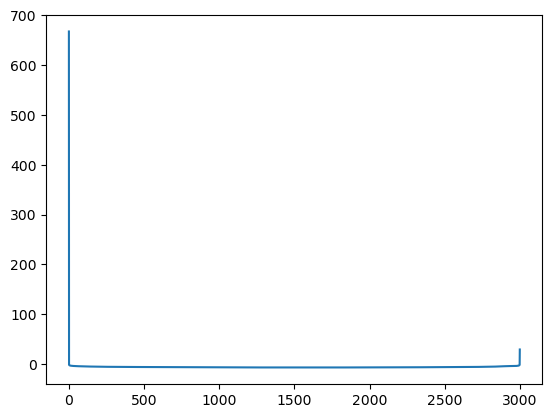

In [51]:
import matplotlib.pyplot as plt
plt.figure()

plt.plot(lqd)

plt.show()

In [48]:
import numpy as np
from scipy.interpolate import interp1d, CubicSpline
from scipy.integrate import cumulative_trapezoid, quad, trapezoid


def lqd2dens(lqd, lqdSup=None, dSup=None, t0=0, c=0, useSplines=True,
             cut=None, verbose=True):

    lqd = np.asarray(lqd)

    # Default cut
    if cut is None:
        cut = [0, 0]

    # Default lqdSup
    if lqdSup is None:
        lqdSup = np.linspace(0, 1, len(lqd))
    else:
        lqdSup = np.asarray(lqdSup)
        if not (np.isclose(lqdSup.min(), 0) and np.isclose(lqdSup.max(), 1)):
            if verbose:
                print("Problem with support of the LQD domain's boundaries - resetting to default.")
            lqdSup = np.linspace(0, 1, len(lqd))

    M = len(lqd)

    # Identify infinite exp(lqd) values
    r = np.where(np.isinf(np.exp(lqd)))[0]

    if len(r) > 0:
        left = r[r < (M//2)]
        right = r[r >= (M//2)]

        if len(left) > 0:
            cut[0] = max(cut[0], left.max())
        if len(right) > 0:
            cut[1] = max(cut[1], M - right.min())

    # ------ Apply cutoff ------
    lqdSup = lqdSup[cut[0] : M - cut[1]]
    lqd = lqd[cut[0] : M - cut[1]]
    M = len(lqd)

    # ------ Ensure c is in support ------
    if c not in lqdSup:
        if c < lqdSup[0] or c > lqdSup[-1]:
            raise ValueError("c is not contained within range of lqdSup after cutoff")

        if verbose:
            print("c is not equal to a value in lqdSup - resetting to closest value")

        c = lqdSup[np.argmin(np.abs(lqdSup - c))]

    c_ind = np.where(lqdSup == c)[0][0]

    # ------ Compute dtemp from LQD ------
    if useSplines:
        # Natural cubic spline approximation of lqd(t)
        spline = CubicSpline(lqdSup, lqd, bc_type='natural')

        def lqd_exp(t):
            return np.exp(spline(t))

        # Build dtemp using numerical integration between grid points
        dtemp_vals = [0.0]
        for i in range(1, len(lqdSup)):
            val, _ = quad(lqd_exp, lqdSup[i-1], lqdSup[i])
            dtemp_vals.append(dtemp_vals[-1] + val)

        dtemp = t0 + np.array(dtemp_vals) - quad(lqd_exp, lqdSup[0], lqdSup[c_ind])[0]

    else:
        # Trapezoidal approximation
        dtemp = t0 + cumulative_trapezoid(np.exp(lqd), lqdSup, initial=0)
        dtemp -= trapezoid(np.exp(lqd[: c_ind+1]), lqdSup[: c_ind+1])

    # ------ Remove duplicates ------
    left_dup = np.concatenate([np.diff(dtemp[: M//2]) == 0, [False]])
    right_dup = np.concatenate([[False], np.diff(dtemp[M//2:]) == 0])

    keep = ~(np.concatenate([left_dup, right_dup]))

    dtemp = dtemp[keep]
    dens_temp = np.exp(-lqd[keep])

    # ------ Interpolate to new dSup ------
    dSup_new = np.linspace(dtemp[0], dtemp[-1], len(dtemp))

    interp = interp1d(dtemp, dens_temp, kind="linear", fill_value="extrapolate")
    dens = interp(dSup_new)

    # Normalize, accounting for truncated LQD domain
    dens = dens / trapezoid(dens, dSup_new) * (lqdSup[-1] - lqdSup[0])

    return {
        "dSup": dSup_new,
        "dens": dens
    }


In [40]:
def T_q(
        density: np.array, 
        density_support: np.array, 
        lqd_support: np.array = None,
        t0 : int = None
        ) -> list[np.array, np.array, np.float64]:
    """Function for converting densities to log quantile density functions

    Args:
        density (np.array): density values on density_support - must be strictly positive (otherwise will truncate) and integrate to 1.
        density_support (np.array): support (grid) for Density domain.
        lqd_support (np.array, optional): support of length M for lqd domain - must begin at 0 and end at 1. Defaults to None.
        t0 (int, optional): value in density_support for which the cdf value c is retained, i.e. c = F(t0). Defaults to None.

    Returns:
        list[np.array, np.array, np.float64]: [lqd_support, lqd, c]

    Example:
        dens_support = np.linspace(0, 1, 512)
        dens = np.full(512, 0.5)
        lqd_support, lqd, c = T_q(density=dens, density_support=dens_support)
    """
    lqd_support = np.linspace(0,1, len(density_support))
    t0 = density_support[0]

    if np.any(density<0):
        raise Exception("There are negative density values")
    if np.abs(np.trapezoid(density, density_support) - 1) > 1e-5:
        warnings.warn("Density does not integrate to 1 with tolerance of 1e-5 - renormalizing now.")
        density = density/np.trapezoid(density, density_support)
    if np.any(density==0):  
        warnings.warn("There are some zero density values - truncating support grid so all are positive.")
        lower_bound = np.min(np.where(density>0))
        upper_bound = np.max(np.where(density>0))
        density_support = density_support[lower_bound : upper_bound]
        density = density/np.trapezoid(density, density_support) 
        
    N = len(density_support)

    if lqd_support is None:
        lqd_support = np.linspace(0,1,N)
    elif not (np.array([lqd_support.min(),lqd_support.max()]) == np.array([0,1])).all():
        warnings.warn(("Problem with support of the LQD domain's boundaries - resetting to default."))
        lqd_support = np.linspace(0,1,N)
        
    if not (t0 in density_support):
        warnings.warn("t0 is not a value in density_support - resetting to closest value")
        t0 = density_support[np.argmin((abs(density_support-t0)))]
    M = len(lqd_support)
    c_ind = np.where(density_support == t0)[0][0]

    # Get CDF and lqd on temporary grid, compute c
    tmp = integrate.cumulative_trapezoid(density, density_support, initial=0)
    c = tmp[c_ind]

    N_tmp = len(tmp)

    # ---- Left duplicates (forward scan)
    first_half = tmp[:N_tmp//2]
    _, indL = np.unique(first_half, return_index=True)
    maskL = np.ones(len(first_half), dtype=bool)
    maskL[np.setdiff1d(np.arange(len(first_half)), indL)] = False  # mark duplicates as False

    # ---- Right duplicates (reverse scan)
    second_half = tmp[N_tmp//2:]
    _, indR_rev = np.unique(second_half[::-1], return_index=True)
    maskR = np.ones(len(second_half), dtype=bool)
    maskR[np.setdiff1d(np.arange(len(second_half)), len(second_half) - 1 - indR_rev)] = False

    mask = np.concatenate([maskL, maskR])
    qtemp = tmp[mask]

    lqd_temp = -np.log(density[mask])

    # Interpolate lqd_support, keeping track of Inf values at boundary, then compute c
    lqd = np.full(M, 0)

    if np.any(np.isinf([lqd_temp[0], lqd_temp[N-1]])):
        tmpInd = np.arange(1, N)
        Ind = np.arange(1, M)
        if lqd_temp[0] == np.inf:
            lqd[0] = np.inf
            tmpInd = tmpInd[-1]
            Ind = Ind[-1]
        if lqd_temp[-1] == np.inf:
            lqd[M] = np.inf
            tmpInd = tmpInd[-len(tmpInd)]
            Ind = Ind[-len(Ind)]

        interp_values = np.interp(
            lqd_support[Ind-1],            # xout
            qtemp[tmpInd-1],               # x
            lqd_temp[tmpInd-1],            # y
            left=lqd_temp[tmpInd-1][0],    # rule = 2 → use endpoint values
            right=lqd_temp[tmpInd-1][-1]
        )

        lqd[Ind] = interp_values
    else:
        interp_values = np.interp(
            lqd_support,
            qtemp,
            lqd_temp,
            left=lqd_temp[0],    # rule = 2 → use endpoint values
            right=lqd_temp[-1]
        )
        lqd = interp_values

    return [lqd_support, lqd, c]

In [58]:
path = r'..\data\processed\BVSP_returns_densities.xlsx'
df_densities = pd.read_excel(path)
df_densities

,Unnamed: 0,2025-05-09 00:00:00,2025-05-12 00:00:00,2025-05-13 00:00:00,2025-05-14 00:00:00,2025-05-15 00:00:00,2025-05-16 00:00:00,2025-05-19 00:00:00,2025-05-20 00:00:00,2025-05-21 00:00:00,...,2025-11-03 00:00:00,2025-11-04 00:00:00,2025-11-05 00:00:00,2025-11-06 00:00:00,2025-11-07 00:00:00,2025-11-10 00:00:00,2025-11-11 00:00:00,2025-11-12 00:00:00,2025-11-13 00:00:00,2025-11-14 00:00:00
0,-0.010323,1.711039e-290,6.488436e-111,1.401400e-178,3.759331e-203,6.816199e-214,2.961104e-18,5.689170e-234,1.587455e-181,1.750181e-157,...,2.173340e-176,1.898166e-303,1.002446e-227,6.988181e-271,1.290040e-218,7.227437e-163,3.756730e-94,1.438911e-204,1.213045e-86,1.532485e-132
1,-0.010316,4.922276e-290,9.750348e-111,2.667176e-178,7.979037e-203,1.566329e-213,3.437162e-18,1.360143e-233,3.091578e-181,3.198271e-157,...,4.233368e-176,6.157135e-303,2.214961e-227,1.772924e-270,2.821983e-218,1.281119e-162,5.390182e-94,3.180056e-204,1.751315e-86,2.523398e-132
2,-0.010309,1.414849e-289,1.464737e-110,5.073678e-178,1.692497e-202,3.596821e-213,3.988719e-18,3.249483e-233,6.017671e-181,5.841581e-157,...,8.241518e-176,1.995232e-302,4.891151e-227,4.494843e-270,6.169383e-218,2.269892e-162,7.731550e-94,7.023381e-204,2.527583e-86,4.153351e-132
3,-0.010302,4.063423e-289,2.199675e-110,9.646633e-178,3.587920e-202,8.253724e-213,4.627578e-18,7.757795e-233,1.170702e-180,1.066420e-156,...,1.603582e-175,6.459191e-302,1.079434e-226,1.138774e-269,1.347923e-217,4.020050e-162,1.108663e-93,1.550131e-203,3.646701e-86,6.833372e-132
4,-0.010295,1.166036e-288,3.302303e-110,1.833202e-177,7.601427e-202,1.892677e-212,5.367364e-18,1.850788e-232,2.276322e-180,1.945849e-156,...,3.118443e-175,2.088974e-301,2.380792e-226,2.883098e-269,2.943232e-217,7.116533e-162,1.589287e-93,3.419014e-203,5.259551e-86,1.123815e-131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.010149,2.655135e-279,2.476846e-28,4.767658e-144,1.210775e-176,2.249178e-241,4.013731e-66,2.137030e-207,2.694908e-141,4.022068e-190,...,3.926483e-148,0.000000e+00,1.288853e-179,1.773374e-136,1.339875e-187,3.773315e-52,6.371291e-22,2.788422e-191,2.687440e-84,1.149253e-119
2996,0.010156,9.413052e-280,2.013623e-28,2.673028e-144,5.997666e-177,9.287773e-242,3.026393e-66,9.398775e-208,1.495677e-141,2.072195e-190,...,2.129876e-148,0.000000e+00,6.367717e-180,9.146873e-137,6.483908e-188,2.725877e-52,5.345817e-22,1.294244e-191,1.870123e-84,7.151680e-120
2997,0.010163,3.334358e-280,1.636503e-28,1.497902e-144,2.969195e-177,3.832611e-242,2.281337e-66,4.130723e-208,8.296620e-142,1.067074e-190,...,1.154696e-148,0.000000e+00,3.144158e-180,4.714586e-137,3.135779e-188,1.968340e-52,4.484051e-22,6.003225e-192,1.300934e-84,4.448604e-120
2998,0.010170,1.180136e-280,1.329581e-28,8.389678e-145,1.469037e-177,1.580422e-242,1.719255e-66,1.814159e-208,4.599750e-142,5.492141e-191,...,6.256676e-149,0.000000e+00,1.551547e-180,2.428361e-137,1.515619e-188,1.420707e-52,3.760077e-22,2.782682e-192,9.046781e-85,2.766069e-120


In [ ]:
lqds = pd.DataFrame()

densities = df_densities.iloc[:,1:]
for day in densities.columns:
    lqd = dens2lqd(df_densities.values[:,0], dSup = df_densities.index.values, lqdSup=t, t0=t0)["lqd"]


array([[1.71103879e-290, 6.48843552e-111, 1.40140033e-178, ...,
        1.43891080e-204, 1.21304474e-086, 1.53248501e-132],
       [4.92227622e-290, 9.75034832e-111, 2.66717629e-178, ...,
        3.18005586e-204, 1.75131485e-086, 2.52339788e-132],
       [1.41484888e-289, 1.46473706e-110, 5.07367808e-178, ...,
        7.02338076e-204, 2.52758254e-086, 4.15335139e-132],
       ...,
       [3.33435795e-280, 1.63650283e-028, 1.49790249e-144, ...,
        6.00322498e-192, 1.30093398e-084, 4.44860444e-120],
       [1.18013564e-280, 1.32958053e-028, 8.38967766e-145, ...,
        2.78268165e-192, 9.04678095e-085, 2.76606861e-120],
       [4.17339582e-281, 1.07987100e-028, 4.69665533e-145, ...,
        1.28900029e-192, 6.28907252e-085, 1.71919662e-120]],
      shape=(3000, 135))